In [61]:
import pandas as pd
import plotly
import matplotlib.pyplot as plt

%matplotlib inline

In [183]:
df = pd.read_csv('kaggle_survey_2022_responses.csv')

/var/folders/zg/4qrl00m92tng0x4lft8qdr9c0000gn/T/ipykernel_70928/613083911.py:1: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kaggle_survey_2022_responses.csv')


In [186]:
question_details = df.iloc[0].to_frame()
question_details.columns = ['text']

In [187]:
question_details['multiple_choice'] = question_details.index.str.contains('_')

question_details['choice'] = question_details.loc[question_details['multiple_choice'], 'text'].str.split(' - ').apply(lambda x: x[-1].strip())

question_details['num'] = (question_details.index).to_series().str.replace('Q', '').str.split('_').apply(lambda x: x[0])
question_details.loc['Duration (in seconds)', 'num'] = 1
question_details['num'] = question_details['num'].astype('int')

In [252]:
def agg_multiple_choice(df, q_details):
    q = df.loc[:, q_details.index].isna().mean() * 100
    q.index = q_details['choice']
    return q

In [277]:
def agg_single_choice(df, q_details):
    q = df.loc[:, q_details.index]
    counts = q.value_counts()
    total = counts.sum()
    return (counts / total * 100)

In [278]:
agg_qs = {}
for i in range(1, question_details['num'].max() + 1):
    i_details = question_details.loc[question_details['num'] == i]
    if i_details.shape[0] > 1:
        print('multiple choice')
        agg_qs[i] = agg_multiple_choice(df, i_details)
    else:
        print('not multiple choice')
        agg_qs[i] = agg_single_choice(df, i_details)

not multiple choice
not multiple choice
not multiple choice
not multiple choice
not multiple choice
multiple choice
multiple choice
not multiple choice
not multiple choice
multiple choice
not multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
not multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
not multiple choice
not multiple choice
not multiple choice
not multiple choice
not multiple choice
not multiple choice
multiple choice
not multiple choice
not multiple choice
multiple choice
not multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
multiple choice
not multiple choice
multiple choice


<AxesSubplot: ylabel='Q3'>

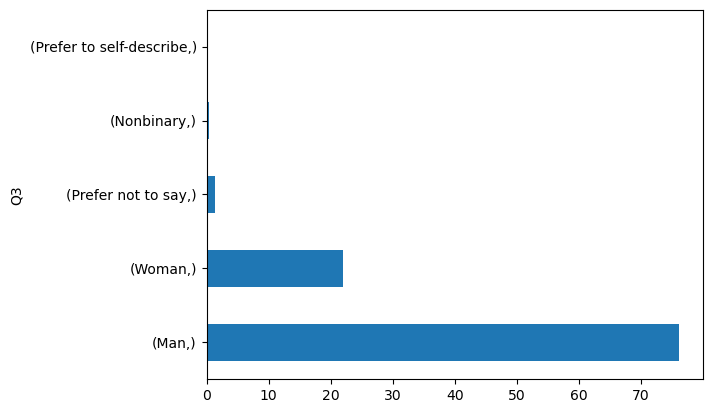

In [279]:
agg_qs[3].plot(kind='barh')